# CREANDO UNA API ⚡



In [ ]:
# Cargamos los módulos que vamos a usar 
!pip install requests
import requests
import pandas as pd
from pandas.core.window import Rolling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from urllib.request import urlopen
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
token = '768d1990357d735cca5786eb36c6bf90df4c22eb10c8e2e4a343cb7c9a8bf270'

In [ ]:
def descarga_bmx_serie(serie,fechainicio,fechafin,token):
  url = 'https://www.banxico.org.mx/SieAPIRest/service/v1/series/'+serie+'/datos/'+fechainicio+'/'+fechafin
  headers = {'Bmx-Token': token}
  response = requests.get(url,headers=headers)
  status = response.status_code
  if status !=200:
    return print('Error en la consulta, codigo {}'.format(status))
  raw_data = response.json()
  data = raw_data['bmx']['series'][0]['datos']
  df = pd.DataFrame(data)
  df.head()
  print(df)

In [ ]:
dolares_bmx = descarga_bmx_serie('SF63528', '2017-01-01','2022-10-01', token)

           fecha      dato
0     02/01/2017  20.73230
1     03/01/2017  20.85200
2     04/01/2017  21.37990
3     05/01/2017  21.36610
4     06/01/2017  21.31440
...          ...       ...
1443  26/09/2022  20.35170
1444  27/09/2022  20.35700
1445  28/09/2022  20.30580
1446  29/09/2022  20.19270
1447  30/09/2022  20.09250

[1448 rows x 2 columns]


In [ ]:
tiie28_bmx = descarga_bmx_serie('SF43783', '2017-01-01','2022-10-01', token)

           fecha    dato
0     02/01/2017  6.1100
1     03/01/2017  6.1100
2     04/01/2017  6.1150
3     05/01/2017  6.1200
4     06/01/2017  6.1200
...          ...     ...
1443  26/09/2022  8.9509
1444  27/09/2022  8.9585
1445  28/09/2022  8.9792
1446  29/09/2022  8.9896
1447  30/09/2022  9.0200

[1448 rows x 2 columns]


In [ ]:
cetes_bmx = descarga_bmx_serie('SF282', '2017-01-01','2022-01-01', token)

         fecha  dato
0   01/01/2017  5.83
1   01/02/2017  6.06
2   01/03/2017  6.32
3   01/04/2017  6.50
4   01/05/2017  6.56
..         ...   ...
56  01/09/2021  4.55
57  01/10/2021  4.84
58  01/11/2021  5.05
59  01/12/2021  5.29
60  01/01/2022  5.53

[61 rows x 2 columns]


In [ ]:
def descarga_bmx_serie(serie,fechainicio,fechafin,token):
  url = 'https://www.banxico.org.mx/SieAPIRest/service/v1/series/'+serie+'/datos/'+fechainicio+'/'+fechafin
  headers = {'Bmx-Token':token}
  response = requests.get(url, headers=headers)
  status = response.status_code
  if status != 200:
    return print('Error en la consulta, codigo {}'.format(status)) 
  raw_data = response.json()
  data = raw_data['bmx']['series'][0]['datos']
  df = pd.DataFrame(data)
  df['dato'] = df['dato'].apply(lambda x: float(x))
  df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
  df.set_index('fecha', inplace=True)
  return df
    


In [ ]:
dolares_bmx = descarga_bmx_serie('SF63528', '2017-01-01','2022-10-01', token)



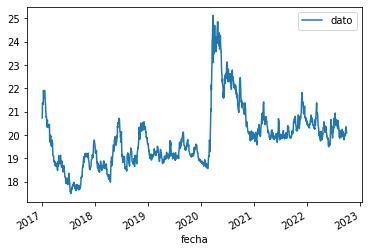

In [ ]:
dolares_bmx.plot(kind='line')

In [ ]:
tiie28_bmx = descarga_bmx_serie('SF43783', '2017-01-01','2022-10-01', token)


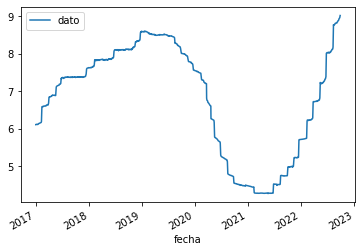

In [ ]:
tiie28_bmx.plot(kind='line')

In [ ]:
cetes_bmx = descarga_bmx_serie('SF282', '2017-01-01','2022-01-01', token)

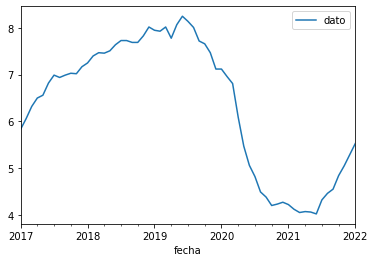

In [ ]:
cetes_bmx.plot(kind='line')

In [ ]:
deuda_bmx = descarga_bmx_serie('SG193', '2017-01-01','2022-01-01', token)

ValueError: ignored